In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

### Creating a function for feature information.

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


### Loading Data, Analyze & Visualize it.

In [6]:
df = pd.read_csv('lending_club_loan_two.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Our overall task is to predict that a person will return loan or not based on the given features. so let's start with loan_status.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

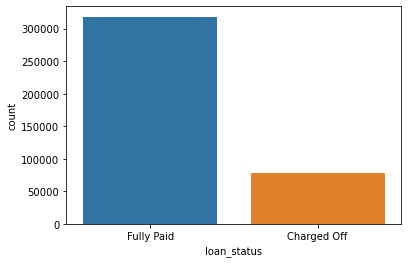

In [8]:
sns.countplot(x='loan_status',data=df)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt'>

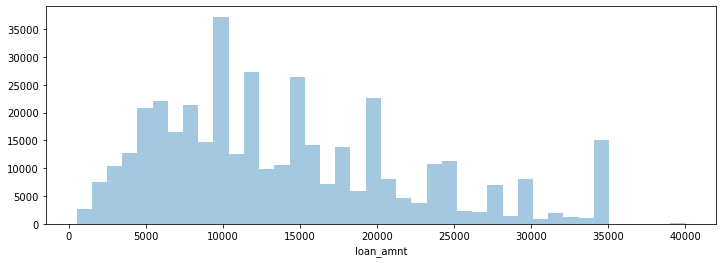

In [9]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

In [10]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

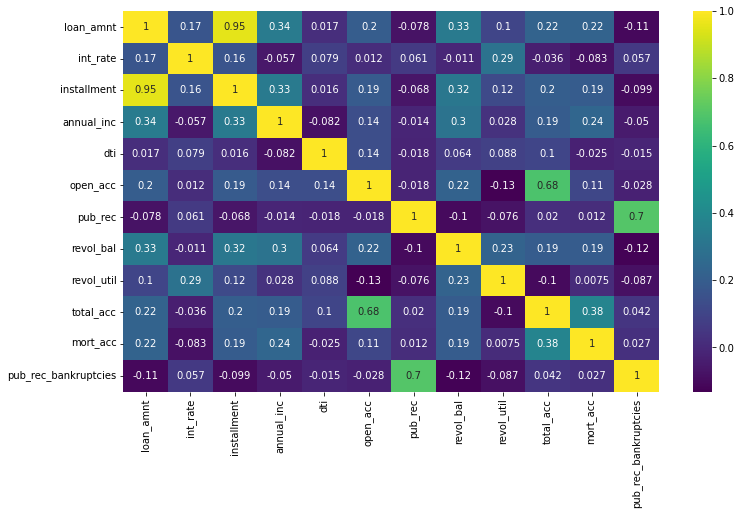

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [12]:
# installment and loan have almost perfect corrolation, let's explore this feature now.

feat_info('installment')
print('\n')
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.


The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

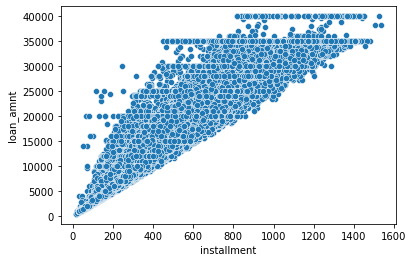

In [13]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

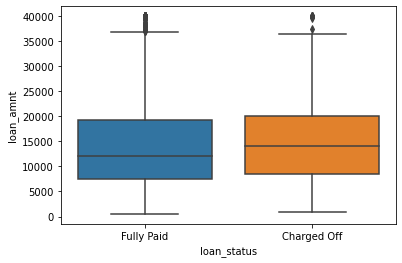

In [14]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [15]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [16]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [17]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

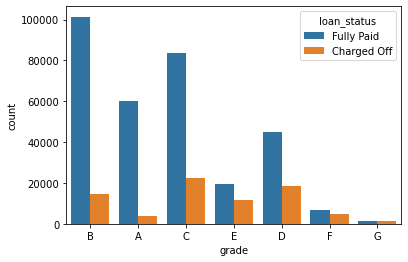

In [18]:
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

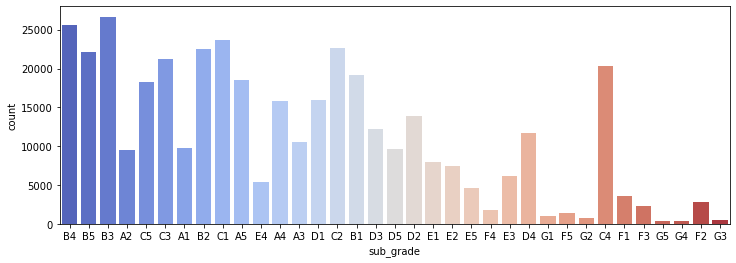

In [19]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,palette='coolwarm' )

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

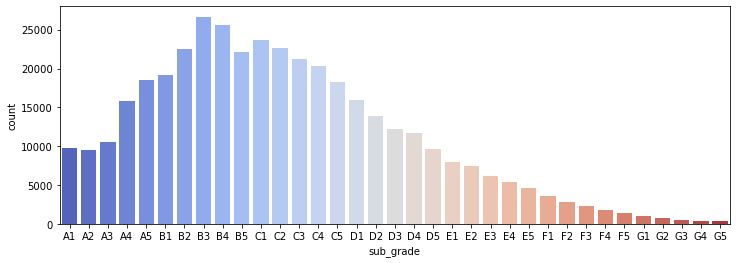

In [20]:
# Sorting subgrade.

plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

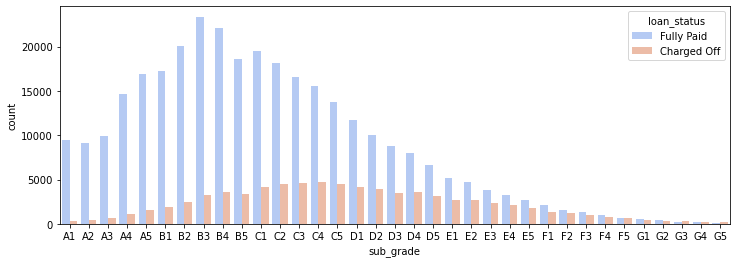

In [21]:
# now see subgrade with hue=loan_status
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

In [22]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [23]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [24]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

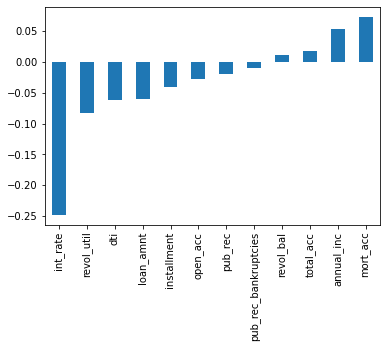

In [25]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

### Let's explore missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.


In [26]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [27]:
len(df)

396030

In [28]:
# Convert this Series to be in term of percentage of the total DataFrame 
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [29]:
#examining emp_title and emp_length to see whether it will be okay to drop them.
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [30]:
df['emp_title'].nunique()

173105

In [31]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [32]:
#there are too many unique job titles to try to convert this to a dummy variable feature. So removing that emp_title column.

df = df.drop('emp_title',axis=1)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

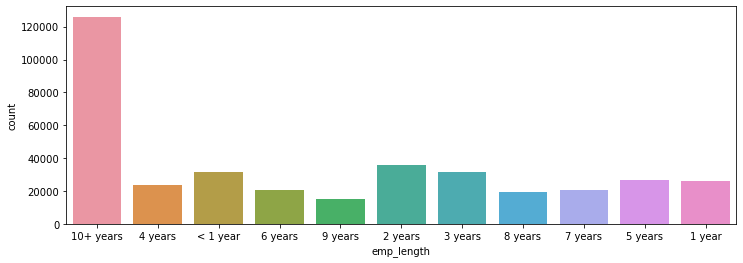

In [33]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df)

In [34]:
# sorting emp_length

sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [35]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

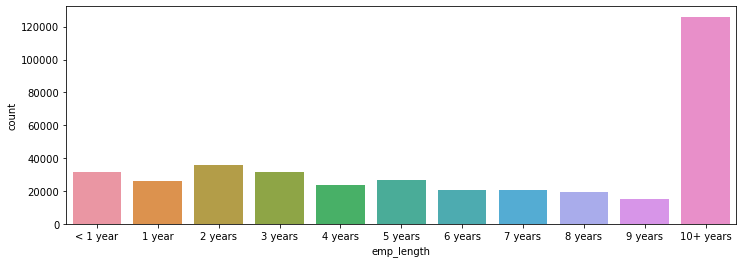

In [36]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

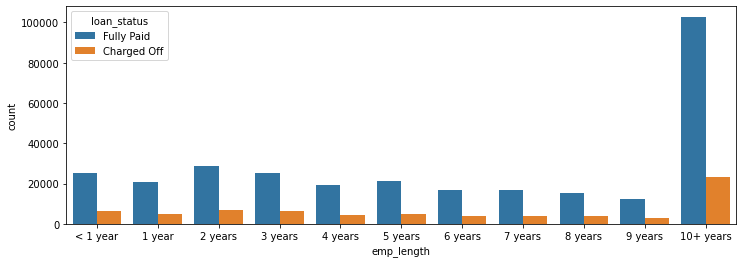

In [37]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [38]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [39]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [40]:
emp_len = emp_co/emp_fp

In [41]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

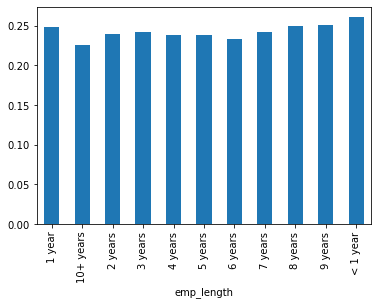

In [42]:
emp_len.plot(kind='bar')

In [43]:
# charge off are extremely similar across all emp_length so let's just drop it.

df = df.drop('emp_length',axis=1)

In [44]:
#reviewing which columns have still missing values.
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [45]:
#Reviewing purpose vs title column to see if we have repeated information.

df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [46]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [47]:
# title column is similar to purpose column so let's drop it.

df = df.drop('title',axis=1)

In [48]:
# there are many missing values in mort_acc column so let's explore that.

feat_info('mort_acc')

Number of mortgage accounts.


In [49]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [50]:
# there are many ways to fill the missing data. let's just explore which column correlate with mort_acc.

df.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [51]:
# total acc have good correlation with mort_acc.let's groupby it with mort_acc.
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [52]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [53]:
# let's create a function which will take missing value of mort_acc from total_acc.

def fill_mort_acc(total_acc,mort_acc):

    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [54]:
# A helpfull link 'https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe'
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [55]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [56]:
# let's remove all other missing data points because there is not much data point in campare with total data.

df = df.dropna()

In [57]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.

In [58]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [59]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [60]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [61]:
df = df.drop('grade',axis=1)

In [62]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [63]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [64]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [65]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [66]:
subgrade_dummies = pd.get_dummies(df[['verification_status','initial_list_status','application_type','purpose']],drop_first=True)

In [67]:
df = df.drop(['verification_status','initial_list_status','application_type','purpose'],axis=1)

In [68]:
df = pd.concat([df,subgrade_dummies],axis=1)

In [69]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [70]:
# Replacing 'None and Any'with Others so we can get only 4 categories.

df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [71]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [72]:
# Now converting them to dummy variables.

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)


In [73]:
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [74]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [75]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [76]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [77]:
# Changing earlies_cr_line to earliest_cr_year because we only need int.
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [78]:
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [79]:
df = df.drop('earliest_cr_line',axis=1)

In [80]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status'], dtype='object')

In [81]:
df = df.drop('issue_d',axis=1)

In [82]:
df = df.drop('loan_status',axis=1)

### Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Normlaizing the data

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler()

In [88]:
X_train = scaler.fit_transform(X_train)

In [89]:
X_test = scaler.transform(X_test)

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [91]:
# Building a sequential model.

model = Sequential()

#input layer
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(58,activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(38,activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(18,activation='relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(1,activation='sigmoid'))

#compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [92]:
#fitting the model
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1158/1158 [==============================] - 6s 4ms/step - loss: 0.2993 - val_loss: 0.2642
Epoch 2/25
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2652 - val_loss: 0.2637
Epoch 3/25
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2627 - val_loss: 0.2625
Epoch 4/25
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2617 - val_loss: 0.2624
Epoch 5/25
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2612 - val_loss: 0.2625
Epoch 6/25
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2605 - val_loss: 0.2619
Epoch 7/25
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2599 - val_loss: 0.2612
Epoch 8/25
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2595 - val_loss: 0.2616
Epoch 9/25
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2592 - val_loss: 0.2612
Epoch 10/25
1158/1158 [==============================] - 5s 4ms/step - loss: 0.259

In [93]:
model.history.history

{'loss': [0.29931849241256714,
  0.26522454619407654,
  0.26268208026885986,
  0.2617485821247101,
  0.2612188756465912,
  0.2605055272579193,
  0.25994211435317993,
  0.25954651832580566,
  0.2592219412326813,
  0.25906166434288025,
  0.2587372958660126,
  0.25852662324905396,
  0.2584497332572937,
  0.2581136226654053,
  0.2579813301563263,
  0.2576698660850525,
  0.2576555013656616,
  0.25736865401268005,
  0.25693392753601074,
  0.2569996416568756,
  0.2564927041530609,
  0.2564413845539093,
  0.2562241554260254,
  0.2561276853084564,
  0.2560727298259735],
 'val_loss': [0.2641684412956238,
  0.2637065649032593,
  0.2625223696231842,
  0.2624136805534363,
  0.2625349164009094,
  0.261946439743042,
  0.26124367117881775,
  0.2615973651409149,
  0.2612069249153137,
  0.26226916909217834,
  0.26198750734329224,
  0.2616235613822937,
  0.2616468071937561,
  0.26160138845443726,
  0.26180654764175415,
  0.2615027129650116,
  0.2616672217845917,
  0.2619926929473877,
  0.2614597678184509

In [94]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

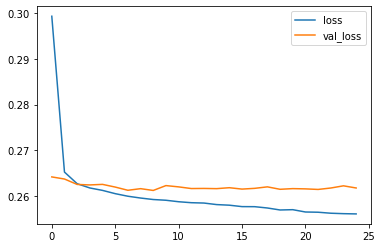

In [95]:
losses[['loss','val_loss']].plot()

In [96]:
#Training the model again.


model = Sequential()

#input layer
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(58,activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(38,activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(18,activation='relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(1,activation='sigmoid'))

#compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [97]:
from tensorflow.keras.callbacks import EarlyStopping

In [98]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [99]:
model.fit(x=X_train,y=y_train,epochs=200,batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/200
1158/1158 [==============================] - 6s 4ms/step - loss: 0.3038 - val_loss: 0.2665
Epoch 2/200
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2654 - val_loss: 0.2657
Epoch 3/200
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2632 - val_loss: 0.2624
Epoch 4/200
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2620 - val_loss: 0.2621
Epoch 5/200
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2613 - val_loss: 0.2621
Epoch 6/200
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2607 - val_loss: 0.2616
Epoch 7/200
1158/1158 [==============================] - 5s 4ms/step - loss: 0.2598 - val_loss: 0.2618
Epoch 8/200
1158/1158 [==============================] - 4s 4ms/step - loss: 0.2599 - val_loss: 0.2615
Epoch 9/200
1158/1158 [==============================] - 4s 4ms/step - loss: 0.2594 - val_loss: 0.2612
Epoch 10/200
1158/1158 [==============================] - 5s 4ms/step - l

In [101]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

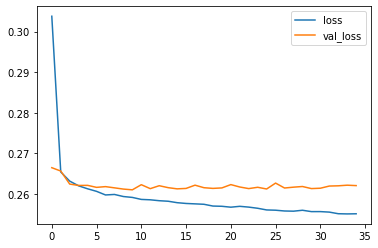

In [102]:
losses[['loss','val_loss']].plot()

In [103]:
from sklearn.metrics import classification_report,confusion_matrix

In [108]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3088/3088 [==============================] - 4s 1ms/step


In [109]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     19458
           1       0.88      1.00      0.93     79347

    accuracy                           0.89     98805
   macro avg       0.93      0.72      0.77     98805
weighted avg       0.90      0.89      0.87     98805

